In [1]:
from defectlib import load_tensors
from defectlib import load_tensors_all
from defectlib import combine_shuffle_tensors, display_tensor, keras_transform, make_model, train_model
from defectlib import Config, remove_sn, remain_sn
from matplotlib import image
from IPython.display import Image
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
import defectlib
import cv2
import os
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [2]:
defect_dict = load_tensors_all('./defect_tensors_D10_1/SH0401/', width=128)

(286, 408, 598)
(19, 408, 598)
(57, 408, 598)
(35, 408, 598)
(63, 634, 421)
(4, 634, 421)
(15, 634, 421)
(9, 634, 421)


In [3]:
tensors, labels, sns = combine_shuffle_tensors(defect_dict)

the final tensor should be 488
number of class 0: 349
	number of SN: 15
number of class 1: 72
	number of SN: 1
number of class 6: 44
	number of SN: 3
number of class 7: 23
	number of SN: 2


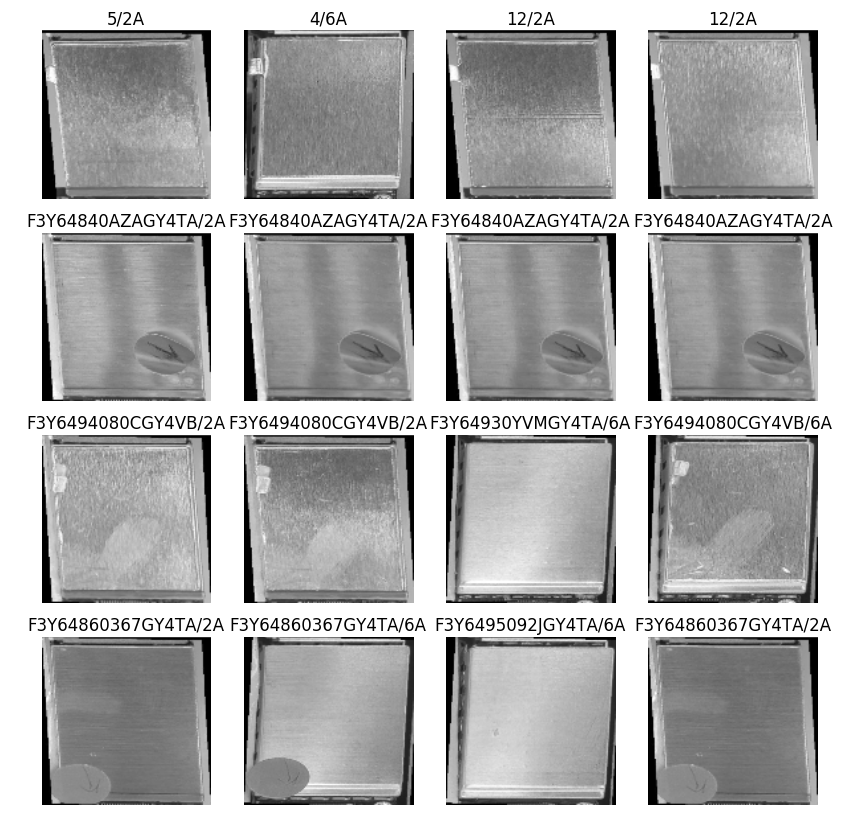

In [4]:
display_tensor(tensors, labels, sns)

In [5]:
from defectlib import GroupKFold_modeling

In [6]:
accuracy_dict, logloss_dict, escape_dict, accuracy_escape_list, models = GroupKFold_modeling(tensors, labels, sns, nb_classes=8, nb_epoch=30, input_shape=(128, 128))

Model 1
the label of validation image: 0
the s/n of validation image: 0
Train on 462 samples, validate on 26 samples
Epoch 1/30
462/462 [==============================] - 8s - loss: 1.1189 - acc: 0.6558 - val_loss: 0.2830 - val_acc: 1.0000
Epoch 2/30
462/462 [==============================] - 7s - loss: 0.6490 - acc: 0.7684 - val_loss: 0.1054 - val_acc: 1.0000
Epoch 3/30
462/462 [==============================] - 7s - loss: 0.4197 - acc: 0.8355 - val_loss: 0.1606 - val_acc: 1.0000
Epoch 4/30
462/462 [==============================] - 8s - loss: 0.2791 - acc: 0.9004 - val_loss: 0.0065 - val_acc: 1.0000
Epoch 5/30
462/462 [==============================] - 8s - loss: 0.2418 - acc: 0.9199 - val_loss: 0.0781 - val_acc: 1.0000
Epoch 6/30
462/462 [==============================] - 8s - loss: 0.1453 - acc: 0.9481 - val_loss: 0.5192 - val_acc: 0.6154
Epoch 7/30
462/462 [==============================] - 7s - loss: 0.1032 - acc: 0.9675 - val_loss: 0.3973 - val_acc: 0.6923
Epoch 8/30
462/462 [==

In [8]:
sorted(accuracy_escape_list, key=lambda x: x[0])

[(0, '0', 0.65384615384615385, 0.6538461538461539),
 (0, '1', 1.0, 1.0),
 (0, '14', 1.0, 1.0),
 (0, '11', 1.0, 1.0),
 (0, '9', 1.0, 1.0),
 (0, '3', 1.0, 1.0),
 (0, '4', 1.0, 1.0),
 (0, '12', 1.0, 1.0),
 (0, '13', 1.0, 1.0),
 (0, '7', 1.0, 1.0),
 (0, '2', 1.0, 1.0),
 (0, '8', 1.0, 1.0),
 (0, '10', 1.0, 1.0),
 (0, '5', 1.0, 1.0),
 (0, '6', 1.0, 1.0),
 (1, 'F3Y64840AZAGY4TA', 0.0, 0.0),
 (6, 'F3Y64920CWAGY4RA', 1.0, 0.0),
 (6, 'F3Y64930YVMGY4TA', 0.20833333333333334, 0.041666666666666664),
 (6, 'F3Y6494080CGY4VB', 0.18181818181818182, 0.8181818181818182),
 (7, 'F3Y6495092JGY4TA', 0.0, 0.0),
 (7, 'F3Y64860367GY4TA', 0.0, 0.0)]